<a href="https://colab.research.google.com/github/NizarArdansyah/Capstone-Project-Machine-Learning/blob/main/Model_Tanah_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
base_dir = '/content/drive/My Drive/Capstone/'
!ls "/content/drive/My Drive/Capstone/"

Soil_Types  Training  Validation


In [ ]:
# !pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
soil_dir = os.path.join(base_dir, 'Soil_Types')
split_dir = os.path.join(base_dir, 'Soil_Types_Splited')
import splitfolders 

splitfolders.ratio(soil_dir, output=split_dir, seed=42, ratio=(0.9,0.1), group_prefix=None)
training_dir = os.path.join(split_dir, 'train')
validation_dir = os.path.join(split_dir, 'val')

Copying files: 154 files [00:01, 101.92 files/s]


In [ ]:
# kuning_dir = os.path.join(soil_dir, 'Tanah_Kuning/')
geluh_dir = os.path.join(soil_dir, 'Tanah_Geluh/')
liat_dir = os.path.join(soil_dir, 'Tanah_Liat/')
aluvial_dir = os.path.join(soil_dir, 'Tanah_Aluvial/')
gambut_dir = os.path.join(soil_dir, 'Tanah_Gambut/')
laterit_dir = os.path.join(soil_dir, 'Tanah_Laterit/')
vulkanik_dir = os.path.join(soil_dir, 'Tanah_Vulkanik/')

print("Jumlah Data Train Tiap Kelas")
# print("Jumlah gambar tanah kuning :", len(os.listdir(kuning_dir)))
print("Jumlah gambar tanah geluh :", len(os.listdir(geluh_dir)))
print("Jumlah gambar tanah liat :", len(os.listdir(liat_dir)))
print("Jumlah gambar tanah aluvial :", len(os.listdir(aluvial_dir)))
print("Jumlah gambar tanah gambut :", len(os.listdir(gambut_dir)))
print("Jumlah gambar tanah laterit :", len(os.listdir(laterit_dir)))
print("Jumlah gambar tanah vulkanik :", len(os.listdir(vulkanik_dir)))

Jumlah Data Train Tiap Kelas
Jumlah gambar tanah geluh : 17
Jumlah gambar tanah liat : 29
Jumlah gambar tanah aluvial : 11
Jumlah gambar tanah gambut : 30
Jumlah gambar tanah laterit : 30
Jumlah gambar tanah vulkanik : 37


In [ ]:
#direktori training
# train_kuning = os.path.join(training_dir, 'Tanah_Kuning/')
train_geluh = os.path.join(training_dir, 'Tanah_Geluh/')
train_liat = os.path.join(training_dir, 'Tanah_Liat/')
train_aluvial = os.path.join(training_dir, 'Tanah_Aluvial/')
train_gambut = os.path.join(training_dir, 'Tanah_Gambut/')
train_laterit = os.path.join(training_dir, 'Tanah_Laterit/')
train_andosol = os.path.join(training_dir, 'Tanah_Andosol/')
train_vulkanik = os.path.join(training_dir, 'Tanah_Vulkanik/')

#direktori validation
# validation_kuning = os.path.join(validation_dir, 'Tanah_Kuning/')
validation_geluh = os.path.join(validation_dir, 'Tanah_Geluh/')
validation_liat = os.path.join(validation_dir, 'Tanah_Liat/')
validation_aluvial = os.path.join(validation_dir, 'Tanah_Aluvial/')
validation_gambut = os.path.join(validation_dir, 'Tanah_Gambut/')
validation_laterit = os.path.join(validation_dir, 'Tanah_Laterit/')
validation_andosol = os.path.join(validation_dir, 'Tanah_Andosol/')
validation_vulkanik = os.path.join(validation_dir, 'Tanah_Vulkanik/')

In [ ]:
def split_data(soil_dir, training_dir, validation_dir, SPLIT_SIZE):
  files = []
  for filename in os.listdir(soil_dir):
    file = soil_dir + filename
    if os.path.getsize(file) > 0:
      files.append(filename)
    else:
      print(filename + ' is zero length, so ignoring.')

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]
  
  for filename in training_set:
    src_file = soil_dir + filename
    dest_file = training_dir + filename
    copyfile(src_file, dest_file)
    
  for filename in testing_set:
    src_file = soil_dir + filename
    dest_file = validation_dir + filename
    copyfile(src_file, dest_file)
  pass


In [ ]:
if len(os.listdir(train_kuning)) > 0:
  for file in os.scandir(train_kuning):
    os.remove(file.path)
if len(os.listdir(train_geluh)) > 0:
  for file in os.scandir(train_geluh):
    os.remove(file.path)
if len(os.listdir(train_liat)) > 0:
  for file in os.scandir(train_liat):
    os.remove(file.path)
if len(os.listdir(train_aluvial)) > 0:
  for file in os.scandir(train_aluvial):
    os.remove(file.path)
if len(os.listdir(train_gambut)) > 0:
  for file in os.scandir(train_gambut):
    os.remove(file.path)
if len(os.listdir(train_laterit)) > 0:
  for file in os.scandir(train_laterit):
    os.remove(file.path)
if len(os.listdir(train_vulkanik)) > 0:
  for file in os.scandir(train_vulkanik):
    os.remove(file.path)

if len(os.listdir(validation_kuning)) > 0:
  for file in os.scandir(validation_kuning):
    os.remove(file.path)
if len(os.listdir(validation_geluh)) > 0:
  for file in os.scandir(validation_geluh):
    os.remove(file.path)
if len(os.listdir(validation_liat)) > 0:
  for file in os.scandir(validation_liat):
    os.remove(file.path)
if len(os.listdir(validation_aluvial)) > 0:
  for file in os.scandir(validation_aluvial):
    os.remove(file.path)
if len(os.listdir(validation_gambut)) > 0:
  for file in os.scandir(validation_gambut):
    os.remove(file.path)
if len(os.listdir(validation_laterit)) > 0:
  for file in os.scandir(validation_laterit):
    os.remove(file.path)
if len(os.listdir(validation_vulkanik)) > 0:
  for file in os.scandir(validation_vulkanik):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .9

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(kuning_dir, train_kuning, validation_kuning, split_size)
split_data(gambut_dir, train_gambut, validation_gambut, split_size)
split_data(laterit_dir, train_laterit, validation_laterit, split_size)
split_data(vulkanik_dir, train_vulkanik, validation_vulkanik, split_size)


# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"\n\nOriginal kuning soil's directory has {len(os.listdir(kuning_dir))} images")
print(f"\n\nOriginal gambut soil's directory has {len(os.listdir(gambut_dir))} images")
print(f"\n\nOriginal laterit soil's directory has {len(os.listdir(laterit_dir))} images")
print(f"\n\nOriginal vulkanik soil's directory has {len(os.listdir(vulkanik_dir))} images")

# Training and validation splits. Check that the number of images matches the expected output.
print(f"There are {len(os.listdir(train_kuning))} images of kuning soil for training")
print(f"There are {len(os.listdir(train_gambut))} images of gambut soil for training")
print(f"There are {len(os.listdir(train_laterit))} images of laterit soil for training")
print(f"There are {len(os.listdir(train_vulkanik))} images of vulkanik soil for training")

print(f"There are {len(os.listdir(validation_kuning))} images of kuning soil for validation")
print(f"There are {len(os.listdir(validation_gambut))} images of gambut soil for validation")
print(f"There are {len(os.listdir(validation_laterit))} images of laterit soil for validation")
print(f"There are {len(os.listdir(validation_vulkanik))} images of vulkanik soil for validation")



Original kuning soil's directory has 39 images


Original gambut soil's directory has 30 images


Original laterit soil's directory has 30 images


Original vulkanik soil's directory has 37 images
There are 35 images of kuning soil for training
There are 27 images of gambut soil for training
There are 27 images of laterit soil for training
There are 33 images of vulkanik soil for training
There are 4 images of kuning soil for validation
There are 3 images of gambut soil for validation
There are 3 images of laterit soil for validation
There are 4 images of vulkanik soil for validation


In [ ]:
n_batch = 32

In [ ]:
def train_val_generators(training_dir, validation_dir):

  train_datagen = ImageDataGenerator(rescale=1.0/255.,
                                     rotation_range=45,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.15,
                                     zoom_range=0.40,
                                     horizontal_flip=True,
                                     vertical_flip=True,
                                     fill_mode='nearest')

  train_generator = train_datagen.flow_from_directory(directory=training_dir,
                                                      batch_size=n_batch,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))

  validation_datagen = ImageDataGenerator(rescale=1.0/255.)

  validation_generator = validation_datagen.flow_from_directory(directory=validation_dir,
                                                                batch_size=n_batch,
                                                                class_mode='categorical',
                                                                target_size=(150, 150))
 
  return train_generator, validation_generator

In [ ]:
train_generator, validation_generator = train_val_generators(training_dir, validation_dir)

Found 145 images belonging to 6 classes.
Found 25 images belonging to 6 classes.


In [ ]:
for image_batch, label_batch in train_generator:
  break
  image_batch.shape, label_batch.shape

In [ ]:
print (train_generator.class_indices)

{'Tanah_Aluvial': 0, 'Tanah_Gambut': 1, 'Tanah_Geluh': 2, 'Tanah_Laterit': 3, 'Tanah_Liat': 4, 'Tanah_Vulkanik': 5}


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch, logs = {}):
    if(logs.get('accuracy') > 0.91):
      print('Akurasi mencapai >90%')
      self.model.stop_training = True

callbacks = myCallback()      

In [ ]:
model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')
  ])


In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_55 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 18, 18, 64)     

In [ ]:
from tensorflow.keras.optimizers import RMSprop
opt = RMSprop(learning_rate = 0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy']) 

Train the model!


In [ ]:
total_sample = train_generator.n
n_epochs = 30

# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    epochs=30,
                    steps_per_epoch = int(total_sample/n_batch),
                    verbose=1,
                    validation_data=validation_generator
                    )


Epoch 1/30
4/4 [==============================] - 3s 729ms/step - loss: 0.6599 - accuracy: 0.7168 - val_loss: 0.4372 - val_accuracy: 0.8400
Epoch 2/30
4/4 [==============================] - 3s 842ms/step - loss: 0.5375 - accuracy: 0.7876 - val_loss: 0.5375 - val_accuracy: 0.7200
Epoch 3/30
4/4 [==============================] - 2s 430ms/step - loss: 0.6265 - accuracy: 0.7500 - val_loss: 0.4157 - val_accuracy: 0.7600
Epoch 4/30
4/4 [==============================] - 2s 520ms/step - loss: 0.5347 - accuracy: 0.7891 - val_loss: 0.3445 - val_accuracy: 0.9200
Epoch 5/30
4/4 [==============================] - 2s 558ms/step - loss: 0.4978 - accuracy: 0.8438 - val_loss: 0.3425 - val_accuracy: 0.9200
Epoch 6/30
4/4 [==============================] - 2s 448ms/step - loss: 0.4321 - accuracy: 0.8319 - val_loss: 0.3481 - val_accuracy: 0.8400
Epoch 7/30
4/4 [==============================] - 2s 598ms/step - loss: 0.5663 - accuracy: 0.7522 - val_loss: 0.2699 - val_accuracy: 0.9200
Epoch 8/30
4/4 [====

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
    
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

Saved model to disk


Transfer learning model evaluation

In [ ]:
#valid_loss, valid_accuracy = model.evaluate(validation_generator)
#print("Accuracy after transfer learning: {}".format(valid_accuracy))

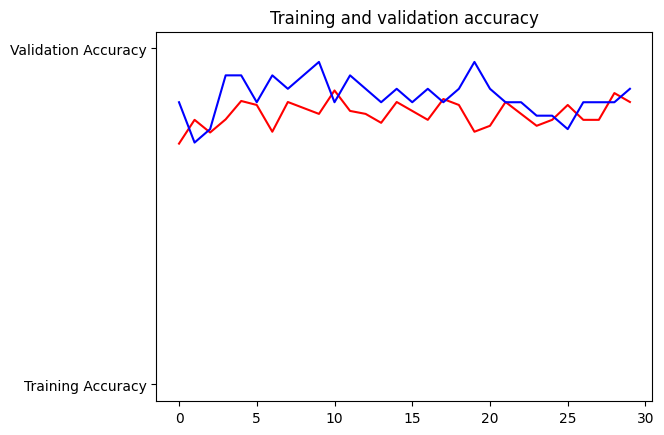

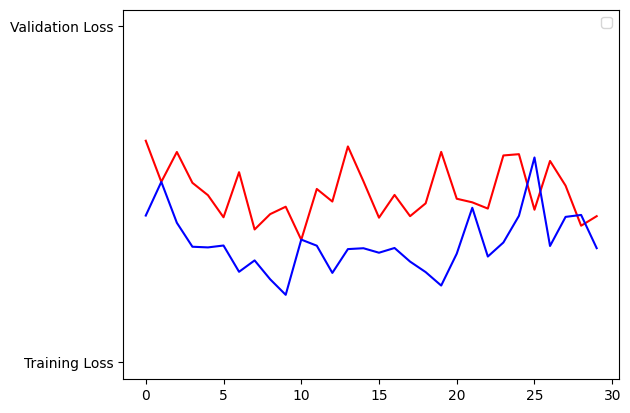

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential, model_from_json

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  prediction = model.predict(images, batch_size=10)

  # Mendapatkan indeks maksimum dari hasil prediksi
  predicted_label_index = np.argmax(prediction)
  # Daftar label yang sesuai dengan indeks prediksi
  labels = ['Tanah Aluvial', 'Tanah Gambut', 'Tanah Geluh', 'Tanah Laterit','Tanah Liat','Tanah Vulkanik']

  # Mendapatkan label prediksi
  predicted_label = labels[predicted_label_index]

  print(fn)
  print(prediction)
  print(f'Hasil prediksi tanah : {predicted_label}')

Saving clay 19.png to clay 19.png
1/1 [==============================] - 0s 21ms/step
clay 19.png
[[0. 0. 0. 0. 1. 0.]]
Hasil prediksi tanah : Tanah Liat


In [ ]:
#from keras.models import load_model
#from keras.preprocessing import image
#import keras.utils as image
#import matplotlib.pyplot as plt
#from google.colab import files
#from tensorflow.keras.utils import load_img, img_to_array
#import numpy as np
#import os
#import cv2


#def load_image(img_path, show=False):

    #img = image.load_img(img_path, target_size=(150, 150))
    #img_tensor = image.img_to_array(img)                    # (height, width, channels)
    #img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    #img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    #if show:
        #plt.imshow(img_tensor[0])                           
        #plt.axis('off')
        #plt.show()

    #return img_tensor


#img_width, img_height = 150, 150
#img = image.load_img('/content/drive/MyDrive/Capstone/Validation/Tanah_Vulkanik/18.jpg', target_size = (img_width, img_height))
#img = image.img_to_array(img)
#img = np.expand_dims(img, axis = 0)

#predict = loaded_model.predict(img)
#print (predict)

# Mendapatkan indeks maksimum dari hasil prediksi
#predicted_label_index = np.argmax(predict)

# Daftar label yang sesuai dengan indeks prediksi
#labels = ['Tanah_Andosol', 'Tanah_Gambut', 'Tanah_Kuning','Tanah_Laterit', 'Tanah_Vulkanik']

# Mendapatkan label prediksi
#predicted_label = labels[predicted_label_index]

#print(predicted_label)

# **Test Model**

In [ ]:
from keras.models import load_model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.utils as image
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Tentukan path folder validasi
validation_dir2 = '/content/drive/MyDrive/Capstone/Validation/Yellow_Soil'

# Inisialisasi list untuk menyimpan data uji dan label
validation_data = []
validation_label = []

# Baca setiap gambar dalam folder validasi
for filename in os.listdir(validation_dir2):
    if filename.endswith(".jpg"):
        path = os.path.join(validation_dir2, filename)
        img = Image.open(path)# Buka img menggunakan PIL
        img = img.resize((150, 150))         # Ubah ukuran img menjadi 150x150
        array_img = np.array(img)
        validation_data.append(array_img)
        validation_label.append(None)

validation_data = np.array(validation_data)
prediksi = model.predict(validation_data)

predict_label = np.argmax(prediksi, axis=1)

# Dapatkan output gambar untuk setiap prediksi
img_dir = '/content/drive/MyDrive/Capstone/Validation'  # Ubah dengan jalur folder gambar yang sesuai
for i in range(len(predict_label)):
    # Konversi array gambar ke objek PIL Image
    gambar = Image.fromarray(validation_data[i])
    
    # Tampilkan gambar dan label prediksi menggunakan matplotlib
    plt.imshow(img)
    plt.title('Label Prediksi: {}'.format(predict_label[i]))
    plt.show()